# Applied Machine Learning : Phase 2
**BUAN 6341**  
**Student Name: Shiva Kumar Reddy Koppula**  

## 1. Preparation

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

# 2. Load the dataset

In [3]:
data = pd.read_csv(r'C:\Shiva Files\Shiva SSD\Shiva\MSBA Cohort\Semester 2\Applied Machine Learning\Project 2/SBA_loans_project_2.csv')

In [4]:
print("Data shape:", data.shape)

Data shape: (799356, 20)


In [5]:
# Dataset Review
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,799356,int64,1,6,"{0: 1, 532920: 1, 532898: 1, 532899: 1, 532900..."
1,City,31040,object,1,30,"{'LOS ANGELES': 10298, 'HOUSTON': 9141, 'NEW Y..."
2,State,51,object,2,3,"{'CA': 116234, 'TX': 62719, 'NY': 51208, 'FL':..."
3,Zip,32704,int64,1,5,"{90015: 842, 10001: 836, 93401: 728, 90010: 66..."
4,Bank,5692,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 77159, 'WELLS F..."
5,BankState,56,object,2,3,"{'CA': 105117, 'NC': 70706, 'IL': 58629, 'OH':..."
6,NAICS,1308,int64,1,6,"{0: 179717, 722110: 24777, 722211: 17231, 8111..."
7,NoEmp,571,int64,1,4,"{1: 136985, 2: 123019, 3: 80527, 4: 65536, 5: ..."
8,NewExist,3,float64,3,3,"{1.0: 573237, 2.0: 225071, 0.0: 934}"
9,CreateJob,231,int64,1,4,"{0: 559592, 1: 56031, 2: 51346, 3: 25591, 4: 1..."


## 3. Data Preprocessing

Encode and replace missing values

Replace features values that appear incorrect

Encode numerical variables that come as strings, for example string $100.01 should be converted to numerical value

In [6]:
data.head(5)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,FORT LEE,NJ,7024,BNB HANA BANK NATL ASSOC,NJ,425120,2,1.0,0,2,1,1,Y,N,10000.0,0.0,10000.0,5000.0,0
1,1,WESTWEGO,LA,70094,JEDCO DEVELOPMENT CORPORATION,LA,812331,62,1.0,6,0,1,1,0,N,353000.0,0.0,353000.0,353000.0,0
2,2,DENVER,CO,80209,WELLS FARGO BANK NATL ASSOC,SD,541611,4,1.0,1,4,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0
3,3,WRANGELL,AK,99929,FIRST BANK,AK,446110,3,2.0,0,0,1,0,N,Y,75000.0,0.0,75000.0,67500.0,0
4,4,MALVERN,AR,72104,CITICAPITAL SMALL BUS. FINANCE,TX,0,1,2.0,0,0,52000,1,0,Y,45000.0,0.0,45000.0,36000.0,1


In [7]:
# Categorical columns
cat_columns = ["City","State","Bank","BankState", "NewExist", "RevLineCr","LowDoc","Zip","NAICS","FranchiseCode","UrbanRural"]
response = "MIS_Status"

# Confirm that the columns mentioned above are categorical within the dataset
data[cat_columns+[response]] = data[cat_columns+[response]].astype(object)

Split the dataset into train, test and validation

In [8]:
y = data["MIS_Status"]
X = data.drop(["MIS_Status"],axis=1)

from sklearn.model_selection import train_test_split
# Split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,test_size=0.15, random_state=0)

# Split train and validation set into separate training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,train_size=70/85, random_state=1)

In [9]:
X_train.shape

(559548, 19)

In [10]:
X_valid.shape

(119904, 19)

In [11]:
X_test.shape

(119904, 19)

In [12]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,559548,int64,1,6,"{273260: 1, 64171: 1, 651188: 1, 413920: 1, 39..."
1,City,27011,object,1,30,"{'LOS ANGELES': 7216, 'HOUSTON': 6369, 'NEW YO..."
2,State,51,object,2,3,"{'CA': 81314, 'TX': 43908, 'NY': 35779, 'FL': ..."
3,Zip,29997,object,1,5,"{90015: 602, 10001: 591, 93401: 509, 90010: 46..."
4,Bank,5353,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 54128, 'WELLS F..."
5,BankState,55,object,2,3,"{'CA': 73510, 'NC': 49724, 'IL': 41159, 'OH': ..."
6,NAICS,1296,object,1,6,"{0: 125932, 722110: 17294, 722211: 12068, 8111..."
7,NoEmp,521,int64,1,4,"{1: 95939, 2: 86024, 3: 56167, 4: 45932, 5: 37..."
8,NewExist,3,object,3,3,"{1.0: 401465, 2.0: 157353, 0.0: 649}"
9,CreateJob,205,int64,1,4,"{0: 391833, 1: 39046, 2: 36042, 3: 17853, 4: 1..."


Encode and replace missing values

In [13]:
# Check the presence of missing values
for col in X_train.columns:
    if X_train[col].isna().any() == True:
        print(col)

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [14]:
# Check the presence of missing values
for col in X_test.columns:
    if X_test[col].isna().any() == True:
        print(col)

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [15]:
# Check the presence of missing values
for col in X_valid.columns:
    if X_valid[col].isna().any() == True:
        print(col)

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [16]:
# Iterate through all columns in the dataset, check for null values, and replace them with the mode for categorical columns and the mean for numerical columns
for col in X_train.columns:
    if X_train[col].isna().any() == True:
        if X_train[col].dtype == 'object':
            print(col)
            X_train[col].fillna(X_train[col].mode()[0],inplace=True)
        elif X_train[col].dtype == 'float64' or X_train[col].dtype == 'int64':
            X_train[col].fillna(X_train[col].mean(),inplace=True)     

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [17]:
# Iterate through all columns in the dataset, check for null values, and replace them with the mode for categorical columns and the mean for numerical columns
for col in X_test.columns:
    if X_test[col].isna().any() == True:
        if X_test[col].dtype == 'object':
            print(col)
            X_test[col].fillna(X_test[col].mode()[0],inplace=True)
        elif X_test[col].dtype == 'float64' or X_test[col].dtype == 'int64':
            print('this is float 64')
            X_test[col].fillna(X_test[col].mean(),inplace=True)   

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [18]:
# Iterate through all columns in the dataset, check for null values, and replace them with the mode for categorical columns and the mean for numerical columns
for col in X_valid.columns:
    if X_valid[col].isna().any() == True:
        if X_valid[col].dtype == 'object':
            print(col)
            X_valid[col].fillna(X_valid[col].mode()[0],inplace=True)
        elif X_valid[col].dtype == 'float64' or X_valid[col].dtype == 'int64':
            #print('this is float 64')
            X_valid[col].fillna(X_valid[col].mean(),inplace=True)   

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [19]:
X_train

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
273260,273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,442299,1,1.0,0,0,1,1,0,Y,75000.0,0.0,75000.0,63750.0
606057,606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,453998,1,2.0,1,1,0,1,N,N,5000.0,0.0,5000.0,4250.0
188662,188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,722110,1,1.0,55,0,1,1,0,N,250000.0,0.0,250000.0,187500.0
45683,45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,0,15,1.0,0,0,1,0,N,N,38000.0,0.0,38000.0,28500.0
347881,347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,611710,4,2.0,1,5,0,1,Y,N,36349.0,0.0,20000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315598,315598,SARVER,PA,16055,"PNC BANK, NATIONAL ASSOCIATION",DE,523930,4,1.0,0,4,1,1,Y,N,35000.0,0.0,35000.0,17500.0
282524,282524,CLOVIS,CA,93611,BANK OF MANHATTAN NATL ASSOC,CA,713940,1,2.0,1,2,1,1,0,N,95172.0,0.0,95200.0,47600.0
86942,86942,PENSACOLA,FL,32502,"SUPERIOR FINANCIAL GROUP, LLC",CA,453910,2,2.0,5,2,1,1,0,N,7500.0,0.0,7500.0,6375.0
666482,666482,WOODLAND,CA,95695,U.S. BANK NATIONAL ASSOCIATION,OH,722410,1,1.0,0,0,1,0,0,N,93500.0,0.0,93500.0,70125.0


In [20]:
# Ensure if all the missing values are filled
for col in X_train.columns:
    if X_train[col].isna().any() == True:
        print(col)

In [21]:
# Ensure if all the missing values are filled
for col in X_test.columns:
    if X_test[col].isna().any() == True:
        print(col)

In [22]:
# Ensure if all the missing values are filled
for col in X_valid.columns:
    if X_valid[col].isna().any() == True:
        print(col)

In [23]:
# Drop index column
X_train.drop("index",axis=1,inplace=True)
X_test.drop("index",axis=1,inplace=True)
X_valid.drop("index",axis=1,inplace=True)

In [24]:
y_train.dtypes

dtype('O')

In [25]:
X_train.head(5)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,442299,1,1.0,0,0,1,1,0,Y,75000.0,0.0,75000.0,63750.0
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,453998,1,2.0,1,1,0,1,N,N,5000.0,0.0,5000.0,4250.0
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,722110,1,1.0,55,0,1,1,0,N,250000.0,0.0,250000.0,187500.0
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,0,15,1.0,0,0,1,0,N,N,38000.0,0.0,38000.0,28500.0
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,611710,4,2.0,1,5,0,1,Y,N,36349.0,0.0,20000.0,10000.0


In [26]:
# Check the unique values in every column
for col in data.columns:
    print(col)
    print(data[col].unique())

index
[     0      1      2 ... 799353 799354 799355]
City
['FORT LEE' 'WESTWEGO' 'DENVER' ... 'EAT STROUDSBURG' 'GUUYTON' 'HOKESSIN']
State
['NJ' 'LA' 'CO' 'AK' 'AR' 'AZ' 'OH' 'CA' 'TX' 'MS' 'WI' 'FL' 'TN' 'WA'
 'NH' 'AL' 'MN' 'MO' 'IL' 'NY' 'VA' 'MI' 'KY' 'IA' 'PA' 'ME' 'MA' 'UT'
 'ID' 'VT' 'RI' 'OK' 'CT' 'KS' 'IN' 'WV' 'OR' 'WY' 'MD' 'SD' 'NC' 'ND'
 'NV' 'GA' 'DC' 'HI' 'MT' 'SC' 'NM' 'NE' 'DE' nan]
Zip
[7024 70094 80209 ... 62766 78081 48816]
Bank
['BNB HANA BANK NATL ASSOC' 'JEDCO DEVELOPMENT CORPORATION'
 'WELLS FARGO BANK NATL ASSOC' ... 'WASHINGTON 1ST FINAN GROUP'
 'COMMUNITY BANK INVESTMENTS INC' 'GTE FCU D/B/A GTE FINANCIAL']
BankState
['NJ' 'LA' 'SD' 'AK' 'TX' 'AZ' 'IL' 'OH' 'MS' 'MN' 'NY' 'FL' 'CA' 'TN'
 'NC' 'WI' 'RI' 'AL' 'MO' 'WA' 'VA' 'CO' 'MI' 'DE' 'PA' 'SC' 'ME' 'MA'
 'UT' 'VT' 'OK' 'CT' 'AR' 'IN' 'KS' 'DC' 'MD' 'ID' 'ND' 'NV' 'GA' nan 'OR'
 'NH' 'KY' 'MT' 'HI' 'IA' 'WY' 'NE' 'NM' 'WV' 'PR' 'GU' 'EN' 'AN' 'VI']
NAICS
[425120 812331 541611 ... 327120 922110 325182]
NoE

Replace features values that appear incorrect

In [27]:
# Replace features values that appear incorrect

import numpy as np
for val in data['RevLineCr'].unique():
    if(val!='Y'):
        X_train['RevLineCr'] = X_train['RevLineCr'].replace(val,'N')
        X_test['RevLineCr'] = X_test['RevLineCr'].replace(val,'N')
        X_valid['RevLineCr'] = X_valid['RevLineCr'].replace(val,'N')
for val in data['LowDoc'].unique():
    if(val!='Y'):
        X_train['LowDoc'] = X_train['LowDoc'].replace(val,'N')
        X_test['LowDoc'] = X_test['LowDoc'].replace(val,'N')
        X_valid['LowDoc'] = X_valid['LowDoc'].replace(val,'N')

In [28]:
X_train.head(5)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,442299,1,1.0,0,0,1,1,N,Y,75000.0,0.0,75000.0,63750.0
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,453998,1,2.0,1,1,0,1,N,N,5000.0,0.0,5000.0,4250.0
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,722110,1,1.0,55,0,1,1,N,N,250000.0,0.0,250000.0,187500.0
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,0,15,1.0,0,0,1,0,N,N,38000.0,0.0,38000.0,28500.0
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,611710,4,2.0,1,5,0,1,Y,N,36349.0,0.0,20000.0,10000.0


## 4. Feature Engineering

In [29]:
# NAICS Code - Extracting the first 2 digits from the NAICS code provides insight into the industry. Therefore, incorporating the NAICS code as an engineered feature is meaningful.

X_train['NAICS_Code'] = X_train['NAICS'].apply(lambda x : str(x)[0:2])
X_train.head(5)
#Again convert NAICS_Code to categorical
X_train['NAICS_Code'] = X_train['NAICS_Code'].astype('object')
#Remove the original NAICS column
X_train.drop("NAICS", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,NAICS_Code
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1,1.0,0,0,1,1,N,Y,75000.0,0.0,75000.0,63750.0,44
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,1,2.0,1,1,0,1,N,N,5000.0,0.0,5000.0,4250.0,45
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1,1.0,55,0,1,1,N,N,250000.0,0.0,250000.0,187500.0,72
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,15,1.0,0,0,1,0,N,N,38000.0,0.0,38000.0,28500.0,0
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,4,2.0,1,5,0,1,Y,N,36349.0,0.0,20000.0,10000.0,61


In [30]:
# Repeating the same for validation and test datasets

X_valid['NAICS_Code'] = X_valid['NAICS'].apply(lambda x : str(x)[0:2])
X_valid.head(5)
# Re-convert NAICS_Code to categorical
X_valid['NAICS_Code'] = X_valid['NAICS_Code'].astype('object')
X_valid.drop("NAICS", axis = 1,inplace=True) # Remove the original NAICS column
X_valid.head(5)

,City,State,Zip,Bank,BankState,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,NAICS_Code
192573,BRUNSWICK,MO,65236,REGIONAL MISSOURI BANK,MO,4,1.0,0,0,1,2,N,Y,104500.0,0.0,104500.0,88825.0,23
18113,ATLANTA,GA,30319,REGIONS BANK,GA,3,1.0,0,3,1,1,N,N,50000.0,0.0,50000.0,40000.0,81
100437,KENVIL,NJ,7847,GE CAP. SMALL BUS. FINAN CORP,TX,5,2.0,0,0,3490,0,N,N,102000.0,0.0,102000.0,91800.0,81
511767,GENEVA,IL,60134,FIFTH THIRD BANK,IL,4,1.0,0,0,1,1,N,Y,110000.0,0.0,110000.0,93500.0,44
378557,PLAINVIEW,TX,79072,COMPASS BANK,TX,4,1.0,0,0,1,2,N,Y,35000.0,0.0,35000.0,29750.0,31


In [31]:
X_test['NAICS_Code'] = X_test['NAICS'].apply(lambda x : str(x)[0:2])
X_test.head(5)
# Re-convert NAICS_Code to categorical
X_test['NAICS_Code'] = X_test['NAICS_Code'].astype('object')
X_test.drop("NAICS", axis = 1,inplace=True) # Remove the original NAICS column
X_test.head(5)

,City,State,Zip,Bank,BankState,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,NAICS_Code
135296,CORVALLIS,OR,97330,MERRILL LYNCH BANK USA,UT,6,1.0,0,6,1,1,N,N,204000.0,0.0,204000.0,153000.0,81
728793,HAMPTON,NH,3842,CITIZENS BANK NATL ASSOC,RI,1,1.0,0,1,1,1,N,N,52000.0,0.0,52000.0,26000.0,81
625100,ARLINGTON HEIGHTS,IL,60005,"SOMERCOR 504, INC.",IL,11,1.0,6,0,1,1,N,N,217000.0,0.0,217000.0,217000.0,52
272373,RUTLAND,VT,5733,KEYBANK NATIONAL ASSOCIATION,OH,9,1.0,0,0,1,0,Y,N,14999.0,0.0,10000.0,5000.0,0
589080,CANTON,OH,44720,CITIZENS BANK NATL ASSOC,RI,2,1.0,0,2,0,1,N,N,50000.0,0.0,50000.0,25000.0,32


Feature - NoEmp

In [32]:
X_train['NoEmp'].describe()

count    559548.000000
mean         11.383184
std          73.954201
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9999.000000
Name: NoEmp, dtype: float64

In [33]:
# Since the column contains outliers, it is sensible to utilize binning techniques
groups = ['Low', 'Med', 'High', 'Very High']

# Define bins 
bins = [-1, 1000, 5000, 7500,9999]

X_train['NoEmp_cut'] = pd.cut(X_train['NoEmp'], labels=groups,bins=bins)
X_train[['NoEmp_cut', 'NoEmp']].head()

,NoEmp_cut,NoEmp
273260,Low,1
606057,Low,1
188662,Low,1
45683,Low,15
347881,Low,4


In [34]:
# Remove original NoEmp column
X_train.drop("NoEmp", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,NAICS_Code,NoEmp_cut
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,0,0,1,1,N,Y,75000.0,0.0,75000.0,63750.0,44,Low
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,1,1,0,1,N,N,5000.0,0.0,5000.0,4250.0,45,Low
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,55,0,1,1,N,N,250000.0,0.0,250000.0,187500.0,72,Low
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,0,0,1,0,N,N,38000.0,0.0,38000.0,28500.0,0,Low
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,1,5,0,1,Y,N,36349.0,0.0,20000.0,10000.0,61,Low


In [35]:
# Repeating the same for validation and test datasets
X_valid['NoEmp_cut'] = pd.cut(X_valid['NoEmp'], labels=groups,bins=bins)
X_valid.drop("NoEmp", axis = 1,inplace=True)

X_test['NoEmp_cut'] = pd.cut(X_test['NoEmp'], labels=groups,bins=bins)
X_test.drop("NoEmp", axis = 1,inplace=True)

Similarly apply binning technique on CreateJob column

In [36]:
X_train['CreateJob'].describe()

count    559548.000000
mean          8.182562
std         232.224501
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8800.000000
Name: CreateJob, dtype: float64

In [37]:
# Since the column contains outliers, it is sensible to utilize binning techniques
groups = ['Low', 'Med', 'High', 'Very High']

# Define bins 
bins = [-1, 100, 5000, 7500,9000]

X_train['CreateJob_cut'] = pd.cut(X_train['CreateJob'], labels=groups,bins=bins)
X_train[['CreateJob_cut', 'CreateJob']].head(10)

,CreateJob_cut,CreateJob
273260,Low,0
606057,Low,1
188662,Low,55
45683,Low,0
347881,Low,1
50386,Low,0
470398,Low,11
773177,Low,1
490498,Low,0
736704,Low,0


In [38]:
# Each category count
pd.DataFrame(X_train['CreateJob_cut'].value_counts())

,count
CreateJob_cut,
Low,558790
Very High,388
Med,368
High,2


In [39]:
# Remove original NoEmp column
X_train.drop("CreateJob", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,NAICS_Code,NoEmp_cut,CreateJob_cut
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,0,1,1,N,Y,75000.0,0.0,75000.0,63750.0,44,Low,Low
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,1,0,1,N,N,5000.0,0.0,5000.0,4250.0,45,Low,Low
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,0,1,1,N,N,250000.0,0.0,250000.0,187500.0,72,Low,Low
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,0,1,0,N,N,38000.0,0.0,38000.0,28500.0,0,Low,Low
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,5,0,1,Y,N,36349.0,0.0,20000.0,10000.0,61,Low,Low


In [40]:
# Since the column contains outliers, it is sensible to utilize binning techniques
X_valid['CreateJob_cut'] = pd.cut(X_valid['CreateJob'], labels=groups,bins=bins)
X_valid.drop("CreateJob", axis = 1,inplace=True)

X_test['CreateJob_cut'] = pd.cut(X_test['CreateJob'], labels=groups,bins=bins)
X_test.drop("CreateJob", axis = 1,inplace=True)

Similarly apply binning on RetainedJob column

In [41]:
X_train['RetainedJob'].describe()

count    559548.000000
mean         10.579598
std         232.950154
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        9500.000000
Name: RetainedJob, dtype: float64

In [42]:
# Since the column contains outliers, it is sensible to utilize binning techniques
groups = ['Low', 'Med', 'High', 'Very High']

# Define bins 
bins = [-1, 100, 5000, 7500,9500]

X_train['RetainedJob_cut'] = pd.cut(X_train['RetainedJob'], labels=groups,bins=bins)
X_train[['RetainedJob_cut', 'RetainedJob']].head(10)

,RetainedJob_cut,RetainedJob
273260,Low,0
606057,Low,1
188662,Low,0
45683,Low,0
347881,Low,5
50386,Low,0
470398,Low,0
773177,Low,0
490498,Low,0
736704,Low,0


In [43]:
# Each category count
pd.DataFrame(X_train['RetainedJob_cut'].value_counts())

,count
RetainedJob_cut,
Low,557631
Med,1527
Very High,389
High,1


In [44]:
# Remove original RetainedJob column
X_train.drop("RetainedJob", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,NAICS_Code,NoEmp_cut,CreateJob_cut,RetainedJob_cut
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,1,1,N,Y,75000.0,0.0,75000.0,63750.0,44,Low,Low,Low
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,0,1,N,N,5000.0,0.0,5000.0,4250.0,45,Low,Low,Low
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,1,1,N,N,250000.0,0.0,250000.0,187500.0,72,Low,Low,Low
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,1,0,N,N,38000.0,0.0,38000.0,28500.0,0,Low,Low,Low
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,0,1,Y,N,36349.0,0.0,20000.0,10000.0,61,Low,Low,Low


In [45]:
# Repeating the same for validation and test datasets
X_valid['RetainedJob_cut'] = pd.cut(X_valid['RetainedJob'], labels=groups,bins=bins)
X_valid.drop("RetainedJob", axis = 1,inplace=True)

X_test['RetainedJob_cut'] = pd.cut(X_test['RetainedJob'], labels=groups,bins=bins)
X_test.drop("RetainedJob", axis = 1,inplace=True)

DisbursementGross column

count    5.595480e+05
mean     2.013426e+05
std      2.871534e+05
min      0.000000e+00
25%      4.200000e+04
50%      1.000000e+05
75%      2.390000e+05
max      1.100000e+07
Name: DisbursementGross, dtype: float64

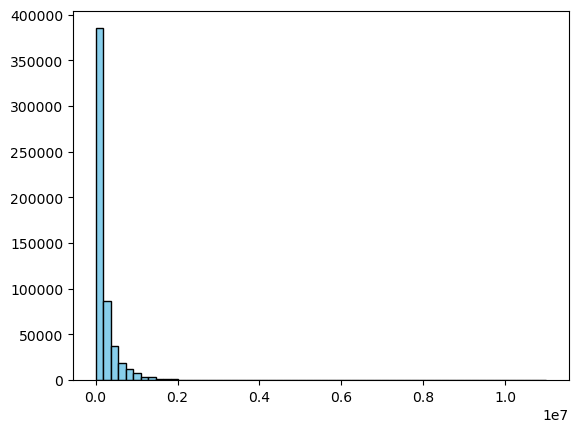

In [46]:
import matplotlib.pyplot as plt
plt.hist(X_train['DisbursementGross'], color='skyblue', edgecolor='black',bins=60)
X_train['DisbursementGross'].describe()

Given the skewness of this data, it would be logical to implement a log transformation

In [47]:
import numpy as np
X_train['log_DisbursementGross'] = np.log2(X_train['DisbursementGross']+1)

count    559548.000000
mean         16.558532
std           1.836565
min           0.000000
25%          15.358136
50%          16.609655
75%          17.866657
max          23.391000
Name: log_DisbursementGross, dtype: float64

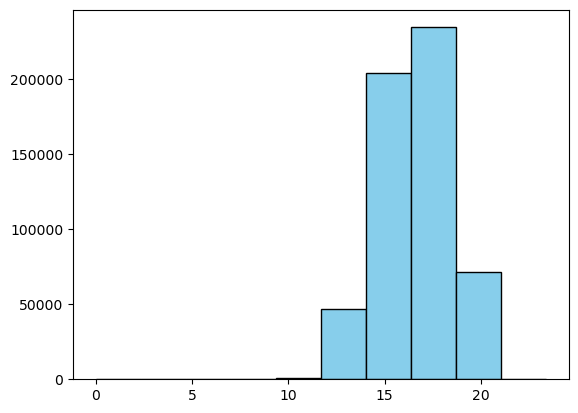

In [48]:
# Re-check the data distribution
plt.hist(X_train['log_DisbursementGross'], color='skyblue', edgecolor='black')
X_train['log_DisbursementGross'].describe()

In [49]:
#Remove original DisbursementGross column
X_train.drop("DisbursementGross", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,GrAppv,SBA_Appv,NAICS_Code,NoEmp_cut,CreateJob_cut,RetainedJob_cut,log_DisbursementGross
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,1,1,N,Y,0.0,75000.0,63750.0,44,Low,Low,Low,16.194622
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,0,1,N,N,0.0,5000.0,4250.0,45,Low,Low,Low,12.288001
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,1,1,N,N,0.0,250000.0,187500.0,72,Low,Low,Low,17.931574
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,1,0,N,N,0.0,38000.0,28500.0,0,Low,Low,Low,15.213750
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,0,1,Y,N,0.0,20000.0,10000.0,61,Low,Low,Low,15.149668


In [50]:
# Likewise, implementing a log transformation for the validation and test datasets
X_valid['log_DisbursementGross'] = np.log2(X_valid['DisbursementGross']+1)
X_valid.drop("DisbursementGross", axis = 1,inplace=True)

X_test['log_DisbursementGross'] = np.log2(X_test['DisbursementGross']+1)
X_test.drop("DisbursementGross", axis = 1,inplace=True)       

GrAppv column



count    5.595480e+05
mean     1.929031e+05
std      2.829910e+05
min      2.000000e+02
25%      3.500000e+04
50%      9.000000e+04
75%      2.256000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

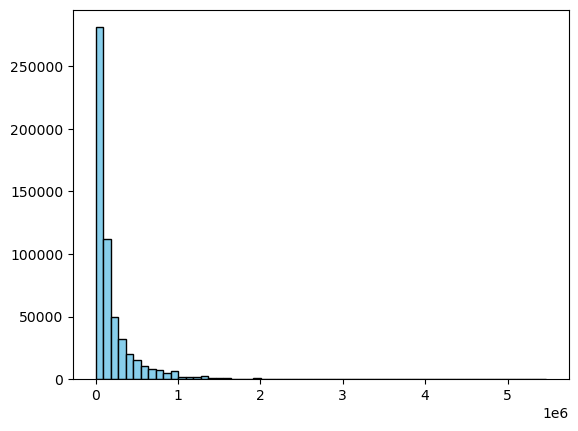

In [51]:
plt.hist(X_train['GrAppv'], color='skyblue', edgecolor='black',bins=60)
X_train['GrAppv'].describe()

Given the skewness of this data, it would be logical to implement a log transformation

In [52]:
import numpy as np
X_train['log_GrAppv'] = np.log2(X_train['GrAppv'])

count    559548.000000
mean         16.417794
std           1.879553
min           7.643856
25%          15.095067
50%          16.457637
75%          17.783408
max          22.383637
Name: log_GrAppv, dtype: float64

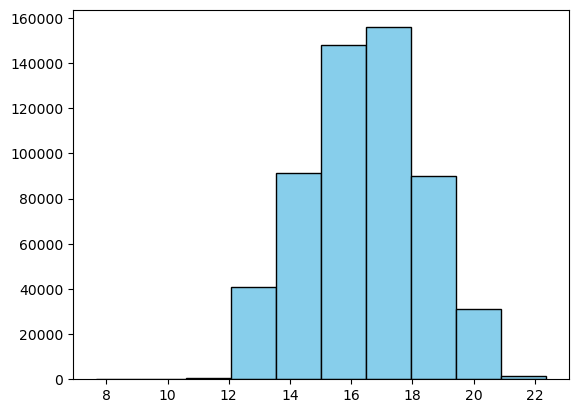

In [53]:
# Re-check the data distribution
plt.hist(X_train['log_GrAppv'], color='skyblue', edgecolor='black')
X_train['log_GrAppv'].describe()

In [54]:
# Remove original GrAppv column
X_train.drop("GrAppv", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,SBA_Appv,NAICS_Code,NoEmp_cut,CreateJob_cut,RetainedJob_cut,log_DisbursementGross,log_GrAppv
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,1,1,N,Y,0.0,63750.0,44,Low,Low,Low,16.194622,16.194603
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,0,1,N,N,0.0,4250.0,45,Low,Low,Low,12.288001,12.287712
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,1,1,N,N,0.0,187500.0,72,Low,Low,Low,17.931574,17.931569
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,1,0,N,N,0.0,28500.0,0,Low,Low,Low,15.213750,15.213712
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,0,1,Y,N,0.0,10000.0,61,Low,Low,Low,15.149668,14.287712


In [55]:
# Likewise, implementing a log transformation for the validation and test datasets
X_valid['log_GrAppv'] = np.log2(X_valid['GrAppv'])
X_valid.drop("GrAppv", axis = 1,inplace=True)

X_test['log_GrAppv'] = np.log2(X_test['GrAppv'])
X_test.drop("GrAppv", axis = 1,inplace=True)    

SBA_Appv column

count    5.595480e+05
mean     1.496560e+05
std      2.282572e+05
min      1.000000e+02
25%      2.125000e+04
50%      6.200000e+04
75%      1.750000e+05
max      5.472000e+06
Name: SBA_Appv, dtype: float64

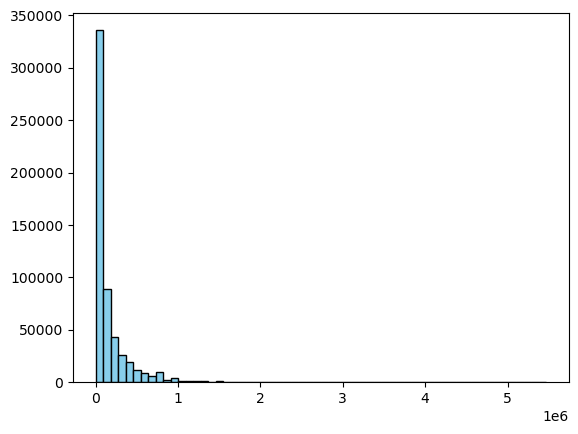

In [56]:
plt.hist(X_train['SBA_Appv'], color='skyblue', edgecolor='black',bins=60)
X_train['SBA_Appv'].describe()

Given the skewness of this data, it would be logical to implement a log transformation

In [57]:
import numpy as np
X_train['log_SBA_Appv'] = np.log2(X_train['SBA_Appv'])

count    559548.000000
mean         15.876274
std           2.063942
min           6.643856
25%          14.375175
50%          15.919981
75%          17.416995
max          22.383637
Name: log_SBA_Appv, dtype: float64

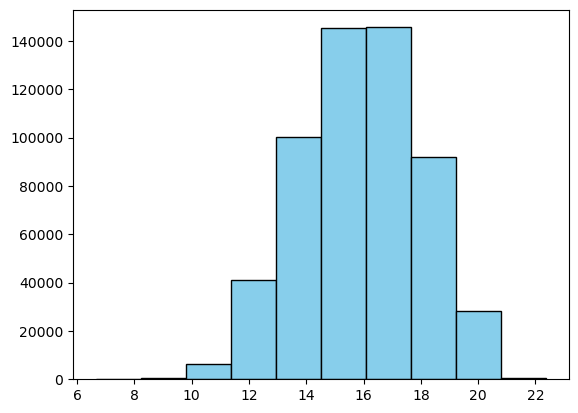

In [58]:
# Re-check the data distribution
plt.hist(X_train['log_SBA_Appv'], color='skyblue', edgecolor='black')
X_train['log_SBA_Appv'].describe()

In [59]:
#Remove original SBA_Appv column
X_train.drop("SBA_Appv", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,NAICS_Code,NoEmp_cut,CreateJob_cut,RetainedJob_cut,log_DisbursementGross,log_GrAppv,log_SBA_Appv
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,1,1,N,Y,0.0,44,Low,Low,Low,16.194622,16.194603,15.960138
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,0,1,N,N,0.0,45,Low,Low,Low,12.288001,12.287712,12.053247
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,1,1,N,N,0.0,72,Low,Low,Low,17.931574,17.931569,17.516531
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,1,0,N,N,0.0,0,Low,Low,Low,15.213750,15.213712,14.798674
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,0,1,Y,N,0.0,61,Low,Low,Low,15.149668,14.287712,13.287712


In [60]:
# Likewise, implementing a log transformation for the validation and test datasets
X_valid['log_SBA_Appv'] = np.log2(X_valid['SBA_Appv'])
X_valid.drop("SBA_Appv", axis = 1,inplace=True)

X_test['log_SBA_Appv'] = np.log2(X_test['SBA_Appv'])
X_test.drop("SBA_Appv", axis = 1,inplace=True)

BalanceGross column

count    559548.000000
mean          4.629463
std        1823.564988
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      996262.000000
Name: BalanceGross, dtype: float64

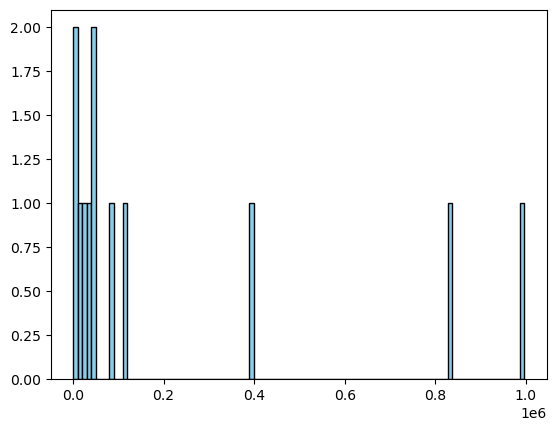

In [61]:
plt.hist(X_train['BalanceGross'], color='skyblue', edgecolor='black',bins=100,range=(600,996262))
X_train['BalanceGross'].describe()

Given the skewness of this data, it would be logical to implement a log transformation

In [62]:
import numpy as np
X_train['log_BalanceGross'] = np.log2(X_train['BalanceGross']+1)

count    559548.000000
mean          0.000339
std           0.074091
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.926167
Name: log_BalanceGross, dtype: float64

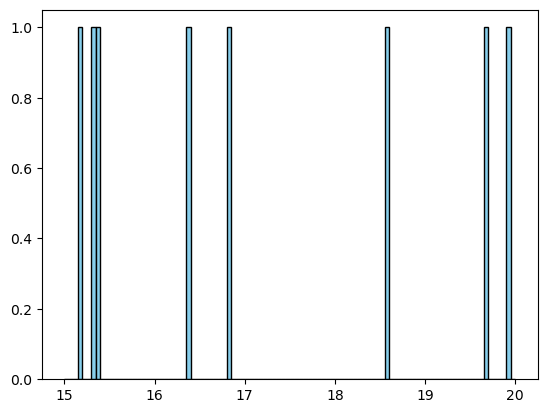

In [63]:
# Re-check the data distribution
plt.hist(X_train['log_BalanceGross'], color='skyblue', edgecolor='black',bins=100,range=(15,20))
X_train['log_BalanceGross'].describe()

In [64]:
#Remove original BalanceGross column
X_train.drop("BalanceGross", axis = 1,inplace=True)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,NAICS_Code,NoEmp_cut,CreateJob_cut,RetainedJob_cut,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,1,1,N,Y,44,Low,Low,Low,16.194622,16.194603,15.960138,0.0
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,0,1,N,N,45,Low,Low,Low,12.288001,12.287712,12.053247,0.0
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,1,1,N,N,72,Low,Low,Low,17.931574,17.931569,17.516531,0.0
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,1,0,N,N,0,Low,Low,Low,15.213750,15.213712,14.798674,0.0
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,0,1,Y,N,61,Low,Low,Low,15.149668,14.287712,13.287712,0.0


In [65]:
# Likewise, implementing a log transformation for the validation and test datasets
X_valid['log_BalanceGross'] = np.log2(X_valid['BalanceGross']+1)
X_valid.drop("BalanceGross", axis = 1,inplace=True)

X_test['log_BalanceGross'] = np.log2(X_test['BalanceGross']+1)
X_test.drop("BalanceGross", axis = 1,inplace=True)

In [66]:
# Gross DisbursementGross per franchise
X_train['Franchise_DisbursementGross_Mean'] = X_train.groupby(['FranchiseCode'])['log_DisbursementGross']\
                                     .transform(lambda x: x.mean())

X_train[['FranchiseCode','log_DisbursementGross','Franchise_DisbursementGross_Mean']].head()

,FranchiseCode,log_DisbursementGross,Franchise_DisbursementGross_Mean
273260,1,16.194622,16.685821
606057,0,12.288001,15.971181
188662,1,17.931574,16.685821
45683,1,15.213750,16.685821
347881,0,15.149668,15.971181


In [67]:
X_train['Franchise_DisbursementGross_Mean'].value_counts()

Franchise_DisbursementGross_Mean
16.685821    397438
15.971181    129912
16.730927      2019
17.037398      1196
16.615071       655
              ...  
17.713984         1
17.397315         1
15.896545         1
17.610174         1
17.021078         1
Name: count, Length: 1986, dtype: int64

In [68]:
# Similarly for validation and test datasets
X_valid['Franchise_DisbursementGross_Mean'] = X_valid.groupby(['FranchiseCode'])['log_DisbursementGross']\
                                     .transform(lambda x: x.mean())
X_test['Franchise_DisbursementGross_Mean'] = X_test.groupby(['FranchiseCode'])['log_DisbursementGross']\
                                     .transform(lambda x: x.mean())

## 5. Categorical variables encoding

In [69]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,27011,object,1,30,"{'LOS ANGELES': 7236, 'HOUSTON': 6369, 'NEW YO..."
1,State,51,object,2,2,"{'CA': 81318, 'TX': 43908, 'NY': 35779, 'FL': ..."
2,Zip,29997,object,1,5,"{90015: 602, 10001: 591, 93401: 509, 90010: 46..."
3,Bank,5353,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 55103, 'WELLS F..."
4,BankState,55,object,2,2,"{'CA': 74490, 'NC': 49724, 'IL': 41159, 'OH': ..."
5,NewExist,3,float64,3,3,"{1.0: 401546, 2.0: 157353, 0.0: 649}"
6,FranchiseCode,2383,object,1,5,"{1: 397438, 0: 129912, 78760: 2019, 68020: 119..."
7,UrbanRural,3,object,1,1,"{1: 292761, 0: 201179, 2: 65608}"
8,RevLineCr,2,object,1,1,"{'N': 434345, 'Y': 125203}"
9,LowDoc,2,object,1,1,"{'N': 490949, 'Y': 68599}"


In [70]:
# Columns that are needed to be encoded
enc_columns = ["City","State","Bank","BankState", "RevLineCr","LowDoc","NoEmp_cut","CreateJob_cut","RetainedJob_cut"]

# Adding columns for target encoding and removing the original ones. 
# Target encoding columns: ["City", "State", "Bank", "BankState", "RevLineCr", "LowDoc", "NoEmp_cut", "CreateJob_cut", "RetainedJob_cut"]"

for col in enc_columns:
    X_train[col+"_trg"] = X_train[col]
    X_test[col+"_trg"] = X_test[col]
    X_valid[col+"_trg"] = X_valid[col]

In [71]:
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,NAICS_Code,NoEmp_cut,CreateJob_cut,RetainedJob_cut,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,1,1,N,Y,44,Low,Low,Low,16.194622,16.194603,15.960138,0.0,16.685821,KENNEWICK,WA,AMERICANWEST BANK,WA,N,Y,Low,Low,Low
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,0,1,N,N,45,Low,Low,Low,12.288001,12.287712,12.053247,0.0,15.971181,FORT WORTH,TX,"SUPERIOR FINANCIAL GROUP, LLC",CA,N,N,Low,Low,Low
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,1,1,N,N,72,Low,Low,Low,17.931574,17.931569,17.516531,0.0,16.685821,SARTELL,MN,BREMER BANK NATL ASSOC,MN,N,N,Low,Low,Low
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,1,0,N,N,0,Low,Low,Low,15.213750,15.213712,14.798674,0.0,16.685821,"COUER D'ALENE,",ID,MOUNTAIN W. BANK A DIVISION OF,ID,N,N,Low,Low,Low
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,0,1,Y,N,61,Low,Low,Low,15.149668,14.287712,13.287712,0.0,15.971181,NEWPORT BEACH,CA,U.S. BANK NATIONAL ASSOCIATION,OH,Y,N,Low,Low,Low


In [72]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=["City_trg","State_trg","Bank_trg","BankState_trg", "RevLineCr_trg","LowDoc_trg","NoEmp_cut_trg","CreateJob_cut_trg","RetainedJob_cut_trg"])

encoder.fit(X_train, y_train)

TargetEncoder(cols=['City_trg', 'State_trg', 'Bank_trg', 'BankState_trg',
                    'RevLineCr_trg', 'LowDoc_trg', 'NoEmp_cut_trg',
                    'CreateJob_cut_trg', 'RetainedJob_cut_trg'])

In [73]:
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
X_valid = encoder.transform(X_valid)
X_train.head(5)

,City,State,Zip,Bank,BankState,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,NAICS_Code,NoEmp_cut,CreateJob_cut,RetainedJob_cut,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg
273260,KENNEWICK,WA,99336,AMERICANWEST BANK,WA,1.0,1,1,N,Y,44,Low,Low,Low,16.194622,16.194603,15.960138,0.0,16.685821,0.135294,0.139241,0.08634,0.075372,0.152499,0.091095,0.174949,0.174828,0.175105
606057,FORT WORTH,TX,76134,"SUPERIOR FINANCIAL GROUP, LLC",CA,2.0,0,1,N,N,45,Low,Low,Low,12.288001,12.287712,12.053247,0.0,15.971181,0.163812,0.188827,0.725136,0.217546,0.152499,0.186645,0.174949,0.174828,0.175105
188662,SARTELL,MN,56377,BREMER BANK NATL ASSOC,MN,1.0,1,1,N,N,72,Low,Low,Low,17.931574,17.931569,17.516531,0.0,16.685821,0.167491,0.116673,0.079607,0.075833,0.152499,0.186645,0.174949,0.174828,0.175105
45683,"COUER D'ALENE,",ID,83814,MOUNTAIN W. BANK A DIVISION OF,ID,1.0,1,0,N,N,0,Low,Low,Low,15.213750,15.213712,14.798674,0.0,16.685821,0.090942,0.141884,0.184874,0.110068,0.152499,0.186645,0.174949,0.174828,0.175105
347881,NEWPORT BEACH,CA,92660,U.S. BANK NATIONAL ASSOCIATION,OH,2.0,0,1,Y,N,61,Low,Low,Low,15.149668,14.287712,13.287712,0.0,15.971181,0.214286,0.185937,0.173713,0.156593,0.25275,0.186645,0.174949,0.174828,0.175105


In [74]:
# Drop original columns
X_train.drop(enc_columns,axis=1,inplace=True)
X_test.drop(enc_columns,axis=1,inplace=True)
X_valid.drop(enc_columns,axis=1,inplace=True)

In [75]:
X_train

,Zip,NewExist,FranchiseCode,UrbanRural,NAICS_Code,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg
273260,99336,1.0,1,1,44,16.194622,16.194603,15.960138,0.0,16.685821,0.135294,0.139241,0.08634,0.075372,0.152499,0.091095,0.174949,0.174828,0.175105
606057,76134,2.0,0,1,45,12.288001,12.287712,12.053247,0.0,15.971181,0.163812,0.188827,0.725136,0.217546,0.152499,0.186645,0.174949,0.174828,0.175105
188662,56377,1.0,1,1,72,17.931574,17.931569,17.516531,0.0,16.685821,0.167491,0.116673,0.079607,0.075833,0.152499,0.186645,0.174949,0.174828,0.175105
45683,83814,1.0,1,0,0,15.213750,15.213712,14.798674,0.0,16.685821,0.090942,0.141884,0.184874,0.110068,0.152499,0.186645,0.174949,0.174828,0.175105
347881,92660,2.0,0,1,61,15.149668,14.287712,13.287712,0.0,15.971181,0.214286,0.185937,0.173713,0.156593,0.25275,0.186645,0.174949,0.174828,0.175105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315598,16055,1.0,1,1,52,15.095109,15.095067,14.095067,0.0,16.685821,0.237465,0.143247,0.195082,0.252684,0.25275,0.186645,0.174949,0.174828,0.175105
282524,93611,2.0,1,1,71,16.538265,16.538674,15.538674,0.0,16.685821,0.154303,0.185937,0.128733,0.217546,0.152499,0.186645,0.174949,0.174828,0.175105
86942,32502,2.0,1,1,45,12.872867,12.872675,12.638210,0.0,16.685821,0.176724,0.270997,0.725136,0.217546,0.152499,0.186645,0.174949,0.174828,0.175105
666482,95695,1.0,1,0,72,16.512694,16.512679,16.097641,0.0,16.685821,0.129497,0.185937,0.173713,0.156593,0.152499,0.186645,0.174949,0.174828,0.175105


## 6. Model Training and Tuning

 - GBM (H2O)

In [76]:
# Import the H2O Python module

import h2o
# Start H2O
h2o.init(max_mem_size = "4G")
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from C:\Users\koppu\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\koppu\AppData\Local\Temp\tmp0zccfc42
  JVM stdout: C:\Users\koppu\AppData\Local\Temp\tmp0zccfc42\h2o_koppu_started_from_python.out
  JVM stderr: C:\Users\koppu\AppData\Local\Temp\tmp0zccfc42\h2o_koppu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,4 months and 13 days
H2O_cluster_name:,H2O_from_python_koppu_7ohyei
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [77]:
from h2o.estimators import H2OGradientBoostingEstimator
import os

# Convert pandas DataFrames to H2O frames for train, test, and validation frames
h2o_X_train = h2o.H2OFrame(X_train)
h2o_y_train = h2o.H2OFrame(y_train.to_frame())
h2o_train = h2o.H2OFrame(pd.concat([X_train,y_train.to_frame()],axis=1))

h2o_X_test = h2o.H2OFrame(X_test)
h2o_y_test = h2o.H2OFrame(y_test.to_frame())
h2o_test = h2o.H2OFrame(pd.concat([X_test,y_test.to_frame()],axis=1))

h2o_X_valid = h2o.H2OFrame(X_valid)
h2o_y_valid = h2o.H2OFrame(y_valid.to_frame())
h2o_valid = h2o.H2OFrame(pd.concat([X_valid,y_valid.to_frame()],axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [78]:
predictors = h2o_train.columns
predictors.remove(response)

h2o_train["MIS_Status"]= h2o_train["MIS_Status"].asfactor()
h2o_test["MIS_Status"]= h2o_test["MIS_Status"].asfactor()
h2o_valid["MIS_Status"]= h2o_valid["MIS_Status"].asfactor()

# Instantiate an H2OGradientBoostingEstimator with arbitrary parameters and train it using the train dataset
gbm_model = H2OGradientBoostingEstimator(learn_rate = 0.05,seed=1234,sample_rate = 0.6,
                                         col_sample_rate = 0.6,score_tree_interval = 10, 
                                         keep_cross_validation_predictions = False,balance_classes=False,max_depth = 5)

gbm_model.train(x=predictors, y=response, training_frame=h2o_train,validation_frame=h2o_valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1714814320802_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22877                  5            5            5             28            32            31.74

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11275539120543503
RMSE: 0.33579069553136076
LogLoss: 0.36428539842065694
Mean Per-Class Error: 0.27991560583408326
AUC: 0.8177318529963432
AUCPR: 0.5213329838224686
Gini: 0.6354637059926864

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24504896327882833
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      389614  72052   0.1561   (72052.0/461666.0)
1      39521   58361   0.4038   (39521.0/97882.0)
Total  429135  130413  0.1994   (111573.0/559548.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.245049     0.511277  209
max f2                       0.14167      0.631393  288
max f0point5                 0.385731     0.531262  133
max accuracy                 0.444183     0.848278  108
max precision                0.818851     1         0
max recall                   0.0241822    1         397
max specificity              0.818851     1         0
max absolute_mcc             0.282734     0.40008   186
max min_per_class_accuracy   0.181928     0.736193  255
max mean_per_class_accuracy  0.17006      0.737073  264
max tns                      0.818851     461666    0
max fns                      0.818851     97878     0
max fps                      0.0215058    461666    399
max tps                      0.0241822    97882     397
max tnr                      0.818851     1         0
max fnr                      0.818851     0.999959  0
max fpr                      0.0215058    1         399
max tpr                      0.0241822    1         397

Gains/Lift Table: Avg response rate: 17.49 %, avg score: 17.52 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100099                   0.665135           4.68266    4.68266            0.819139         0.703842   0.819139                    0.703842            0.0468728       0.0468728                  368.266   368.266            0.0446785
2        0.0200019                   0.606645           4.4211     4.552              0.773386         0.635918   0.796283                    0.66991             0.0441756       0.0910484                  342.11    355.2              0.0861098
3        0.0300457                   0.562172           4.02295    4.37514            0.703737         0.582292   0.765346                    0.640621            0.0404058       0.131454                   302.295   337.514            0.122909
4        0.0400019                   0.529493           3.70945    4.20946            0.648896         0.544957   0.736362                    0.61681             0.0369322       0.168386                   270.945   320.946            0.155604
5        0.0502566                   0.503251           3.43312    4.05105            0.600558       

In [79]:
# Obtain the AUC on the validation set
perf = gbm_model.model_performance(h2o_valid)
print(perf.auc())

0.7968336157247828


In [80]:
print(gbm_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1714814320802_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22877                  5            5            5             28            32            31.74

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11275539120543503
RMSE: 0.33579069553136076
LogLoss: 0.36428539842065694
Mean Per-Class Error: 0.27991560583408326
AUC: 0.8177318529963432
AUCPR: 0.5213329838224686
Gini: 0.6354637059926864

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24504896327882833
       0       1       Error    Rate
-----  ------  ------  -------  -----------

In [81]:
# Set the parameters for hyper-parameter tuning
params_drf = {'learn_rate' : [0.01,0.05],
                'learn_rate_annealing':[0.99,0.995],
                'sample_rate': [0.6,0.8],
                'col_sample_rate' : [0.8],
                'sample_rate_per_class' : [[0.6,0.4],[0.7,0.3]],
                'balance_classes' : [True,False],
                'max_depth' : [3,6,9,12,15],
                }

In [82]:
# Model tuning
# DRF hyperparameters
from h2o.grid.grid_search import H2OGridSearch

drf_grid  = H2OGridSearch(model = H2OGradientBoostingEstimator(seed=1234,keep_cross_validation_predictions= False,score_tree_interval = 10),
                          grid_id='drf_grid',
                          hyper_params=params_drf)

drf_grid.train(x=predictors, y=response,
               nfolds=0,
               training_frame=h2o_train,
               validation_frame=h2o_valid,
               seed=123)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,balance_classes,col_sample_rate,learn_rate,learn_rate_annealing,max_depth,sample_rate,sample_rate_per_class,model_ids,logloss
,false,0.8,0.05,0.995,15.0,0.6,"[0.6, 0.4]",drf_grid_model_40,0.3619926
,false,0.8,0.05,0.995,15.0,0.8,"[0.6, 0.4]",drf_grid_model_80,0.3619926
,false,0.8,0.05,0.99,15.0,0.6,"[0.6, 0.4]",drf_grid_model_36,0.3624121
,false,0.8,0.05,0.99,15.0,0.8,"[0.6, 0.4]",drf_grid_model_76,0.3624121
,false,0.8,0.05,0.995,12.0,0.6,"[0.6, 0.4]",drf_grid_model_32,0.3633865
,false,0.8,0.05,0.995,12.0,0.8,"[0.6, 0.4]",drf_grid_model_72,0.3633865
,false,0.8,0.05,0.99,12.0,0.6,"[0.6, 0.4]",drf_grid_model_28,0.3646027
,false,0.8,0.05,0.99,12.0,0.8,"[0.6, 0.4]",drf_grid_model_68,0.3646027
,true,0.8,0.05,0.995,12.0,0.6,"[0.6, 0.4]",drf_grid_model_31,0.3688239
,true,0.8,0.05,0.995,12.0,0.8,"[0.6, 0.4]",drf_grid_model_71,0.3688239


In [83]:
# Choose the best model based on maximum AUC
# Sort Grid by performance metric F1
drf_gridperf = drf_grid.get_grid(sort_by='AUC', decreasing=True)
drf_gridperf

,balance_classes,col_sample_rate,learn_rate,learn_rate_annealing,max_depth,sample_rate,sample_rate_per_class,model_ids,auc
,true,0.8,0.05,0.995,15.0,0.6,"[0.7, 0.3]",drf_grid_model_119,0.8264717
,true,0.8,0.05,0.995,15.0,0.8,"[0.7, 0.3]",drf_grid_model_159,0.8264717
,true,0.8,0.05,0.995,15.0,0.6,"[0.6, 0.4]",drf_grid_model_39,0.8261614
,true,0.8,0.05,0.995,15.0,0.8,"[0.6, 0.4]",drf_grid_model_79,0.8261614
,true,0.8,0.05,0.99,15.0,0.6,"[0.7, 0.3]",drf_grid_model_115,0.8260612
,true,0.8,0.05,0.99,15.0,0.8,"[0.7, 0.3]",drf_grid_model_155,0.8260612
,true,0.8,0.05,0.99,15.0,0.6,"[0.6, 0.4]",drf_grid_model_35,0.8256427
,true,0.8,0.05,0.99,15.0,0.8,"[0.6, 0.4]",drf_grid_model_75,0.8256427
,false,0.8,0.05,0.99,15.0,0.6,"[0.6, 0.4]",drf_grid_model_36,0.8256314
,false,0.8,0.05,0.99,15.0,0.8,"[0.6, 0.4]",drf_grid_model_76,0.8256314


In [84]:
# Retrieve the top model selected based on validation AUC.
best_drf = drf_gridperf.models[0]

# Generate a Confusion Matrix on the test dataset using the best F1 probability threshold
print("Best F1 threshold:",best_drf.model_performance(h2o_test).F1()[0][0],"\n",
      " F1:",
      best_drf.model_performance(h2o_test).F1()[0][1])

best_drf.model_performance(h2o_test).confusion_matrix()

Best F1 threshold: 0.11653655283210795 
  F1: 0.532968580279197


,0,1,Error,Rate
0,83438.0,15385.0,0.1557,(15385.0/98823.0)
1,7833.0,13248.0,0.3716,(7833.0/21081.0)
Total,91271.0,28633.0,0.1936,(23218.0/119904.0)


In [85]:
# After model tuning, the following parameters were selected
balance_classes = True
col_sample_rate = 0.8
learn_rate = 0.05
learn_rate_annealing = 0.995
max_depth = 15
sample_rate = 0.6
sample_rate_per_class = [0.6, 0.4]
keep_cross_validation_predictions= False
score_tree_interval = 10

# AUC on test dataset
perf = best_drf.model_performance(h2o_test)
print(perf.auc())

0.8240620272899875


In [86]:
# AUC on train dataset
perf = best_drf.model_performance(h2o_train)
print(perf.auc())

0.9169008532389559


## 7. Model interpretation

C:\Users\koppu\anaconda3\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


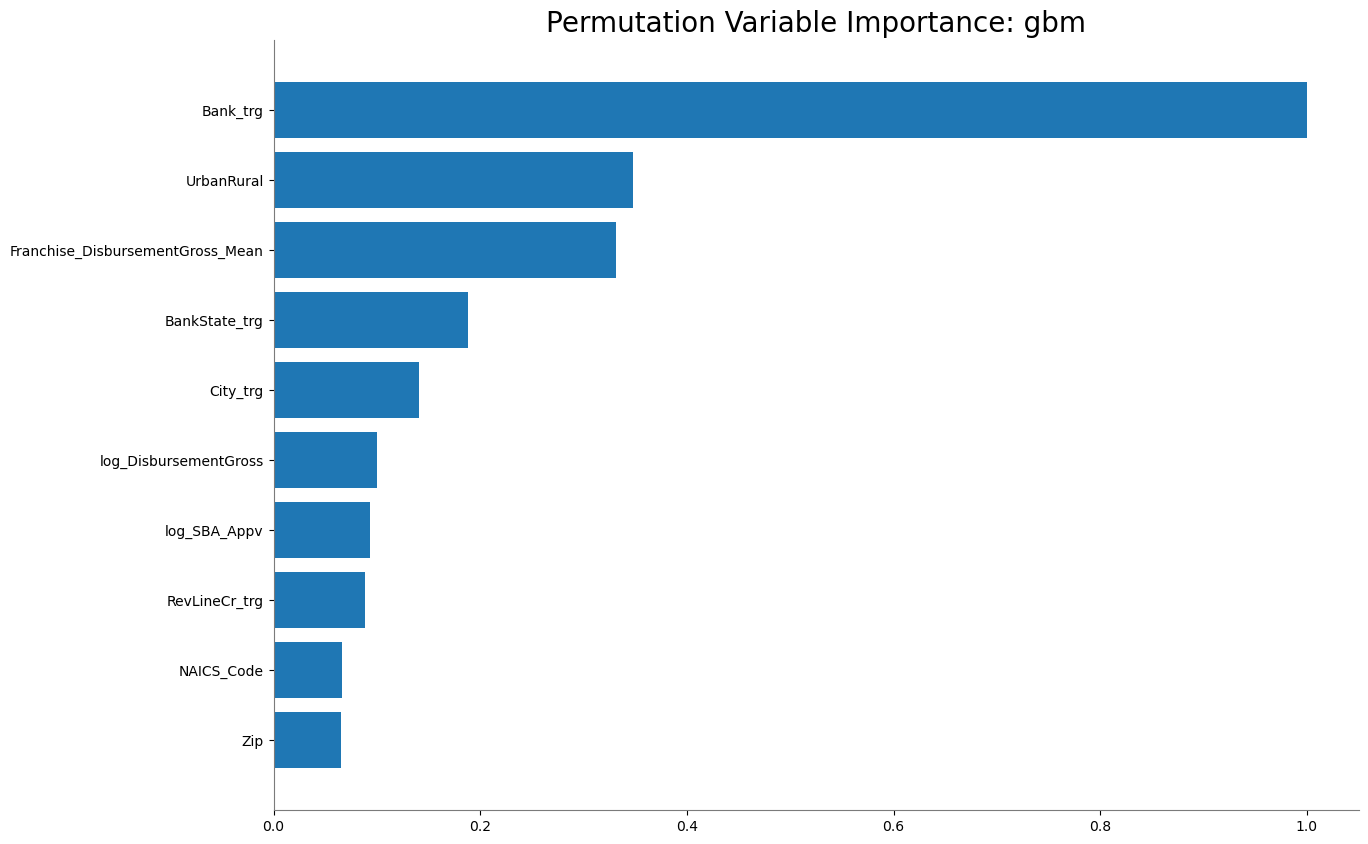

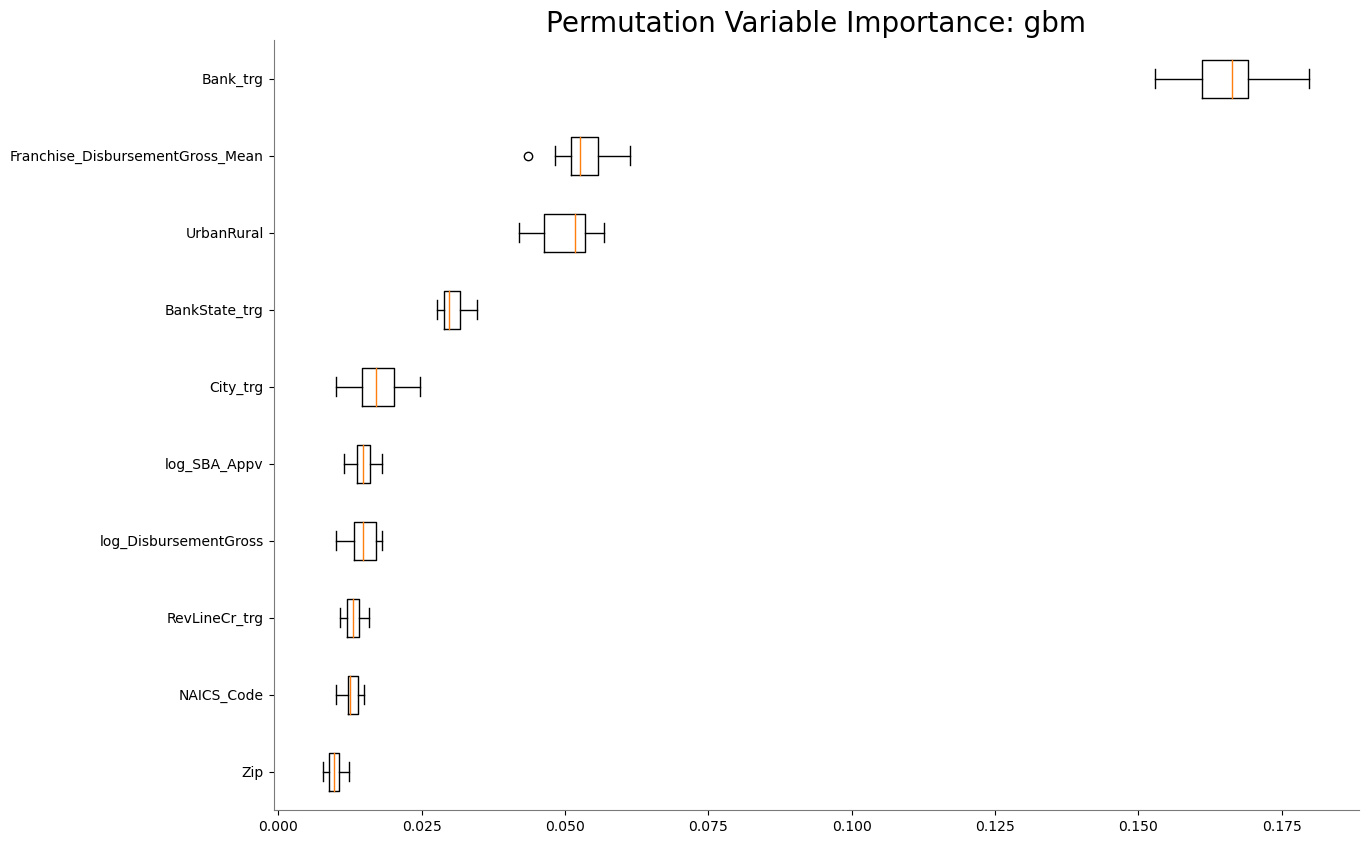

Variable,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,Run 11,Run 12,Run 13,Run 14,Run 15
Bank_trg,0.1564089,0.1593439,0.1703772,0.1674695,0.1798110,0.1669583,0.1743781,0.1661045,0.1597382,0.1529311,0.1624058,0.1662806,0.1677927,0.1634638,0.1766738
Franchise_DisbursementGross_Mean,0.0504146,0.0532907,0.0526169,0.0557218,0.0518370,0.0557877,0.0558071,0.0435622,0.0481888,0.0535255,0.0514025,0.0613383,0.0509640,0.0571536,0.0511759
UrbanRural,0.0419169,0.0540368,0.0567389,0.0458996,0.0516810,0.0534920,0.0537567,0.0524705,0.0517935,0.0500742,0.0440404,0.0464225,0.0469037,0.0461022,0.0533360
BankState_trg,0.0289718,0.0336973,0.0291880,0.0345360,0.0297553,0.0346059,0.0294491,0.0299059,0.0276820,0.0287150,0.0312411,0.0314411,0.0283574,0.0289517,0.0319583
log_DisbursementGross,0.0176562,0.0175767,0.0137647,0.0153981,0.0176277,0.0113441,0.0138401,0.0181068,0.0138148,0.0105685,0.0165680,0.0155049,0.0101179,0.0124940,0.0148045
City_trg,0.0165686,0.0210989,0.0181965,0.0144003,0.0247709,0.0144282,0.0199273,0.0202659,0.0137870,0.0146775,0.0101017,0.0170521,0.0169343,0.0200958,0.0224080
NAICS_Code,0.0125029,0.0126423,0.0122811,0.0122242,0.0122041,0.0147344,0.0131435,0.0140915,0.0101315,0.0122199,0.0116630,0.0142483,0.0118279,0.0148958,0.0136513
RevLineCr_trg,0.0123556,0.0142815,0.0117048,0.0122727,0.0138059,0.0145604,0.0135863,0.0147781,0.0106742,0.0116984,0.0129924,0.0138890,0.0127201,0.0157976,0.0114738
log_SBA_Appv,0.0114910,0.0146452,0.0157912,0.0129840,0.0147141,0.0160593,0.0148480,0.0163553,0.0153137,0.0123578,0.0133188,0.0180779,0.0153289,0.0139552,0.0166844
Zip,0.0087321,0.0102054,0.0096457,0.0105473,0.0088725,0.0107402,0.0086733,0.0087873,0.0083802,0.0077728,0.0119876,0.0123789,0.0104626,0.0088726,0.0098074


In [87]:
# Compute feature importance for the test dataset
permutation_varimp = best_drf.permutation_importance(h2o_test, use_pandas=True)

# plot permutation importance (bar plot)
best_drf.permutation_importance_plot(h2o_test)

# plot permutation importance (box plot)
best_drf.permutation_importance_plot(h2o_test, n_repeats=15)

Based on the graph provided above, we can conclude that Bank_trg, UrbanRural, and Franchise_DisbursementGross_Mean are the top three most important features.

In [88]:
# The function is to calculate Shapley values (contributions) and plot them for multiple records
import shap
def examine_all_reason_codes(data, model):
    
    shap_contribs = model.predict_contributions(data)
    
    col_mapping = {}
    for i in data.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.summary_plot(shap_contribs[shap_cols].values, 
                             X[shap_cols].values,
                             feature_names=shap_cols
                            )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


C:\Users\koppu\anaconda3\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\koppu\anaconda3\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\koppu\anaconda3\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Py

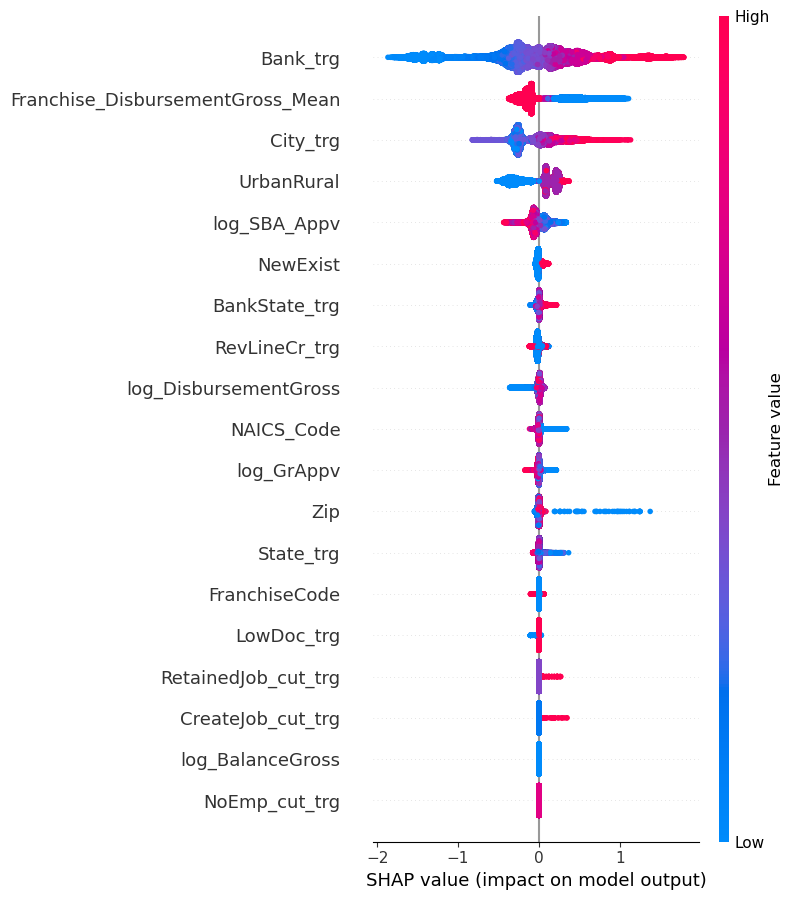

In [89]:
examine_all_reason_codes(h2o_test, gbm_model)

Based on the SHAP summary plot
 - Bank_trg and UrbanRural are prominent features affecting the model's predictions, with Bank_trg showing a significant positive influence on the output as feature values increase. 
 - Franchise_DisbursementGross_Mean and City_trg are also crucial, with Franchise_DisbursementGross_Mean typically enhancing the prediction as its value increases. 
 - Features like log_DisbursementGross and NAICS_Code show both positive and negative impacts on the model's output, indicating diverse effects depending on the specific values they take. 
 - The spread of SHAP values across features like log_SBA_Appv and RevLineCr_trg suggests variability in their impact, affecting the prediction to different extents based on their values.

In [90]:
best_drf.predict(h2o_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.970116,0.0298835
0,0.884629,0.115371
0,0.988264,0.011736
0,0.94932,0.0506795
1,0.723632,0.276368
0,0.893518,0.106482
0,0.931374,0.0686261
0,0.971715,0.0282845
1,0.711822,0.288178
0,0.97587,0.0241297


In [91]:
# Perform residual analysis to debug the model

yhat = 'p_stat'
resid = 'r_stat'
preds1 = best_drf.predict(h2o_test).drop(['predict', 'p0'])
preds1.columns = [yhat]
test_yhat = h2o_test.cbind(preds1[yhat])
test_yhat

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Zip,NewExist,FranchiseCode,UrbanRural,NAICS_Code,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg,MIS_Status,p_stat
97330,1,1,1,81,17.6382,17.6382,17.2232,0,16.6856,0.0737402,0.154967,0.0696517,0.170434,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0298835
3842,1,1,1,81,15.6663,15.6662,14.6662,0,16.6856,0.242678,0.105333,0.213964,0.196392,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.115371
60005,1,1,1,52,17.7273,17.7273,17.7273,0,16.6856,0.233576,0.226742,0,0.222673,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.011736
5733,1,1,0,0,13.8727,13.2877,12.2877,0,16.6856,0.0775212,0.0698348,0.115626,0.156593,0.25275,0.186645,0.174949,0.174828,0.175105,0,0.0506795
44720,1,0,1,32,15.6097,15.6096,14.6096,0,15.9525,0.211144,0.159431,0.213964,0.196392,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.276368
84065,1,1,2,23,17.6139,15.0951,14.0951,0,16.6856,0.161905,0.180573,0.141618,0.180182,0.25275,0.186645,0.174949,0.174828,0.175105,0,0.106482
91402,1,1,1,32,16.1946,16.1946,15.9601,0,16.6856,0.225734,0.185937,0.0529148,0.217546,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0686261
14901,1,1,0,54,15.92,15.92,15.768,0,16.6856,0.153285,0.198692,0.12227,0.167513,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0282845
2021,1,0,1,54,16.2419,15.0951,14.0951,0,15.9525,0.211144,0.128972,0.270076,0.291891,0.25275,0.186645,0.174949,0.174828,0.175105,0,0.288178
43026,1,1,0,0,15.7987,15.7987,15.3836,0,16.6856,0.127464,0.159431,0.132498,0.156593,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0241297


In [92]:
h2o_test.head(5)

Zip,NewExist,FranchiseCode,UrbanRural,NAICS_Code,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg,MIS_Status
97330,1,1,1,81,17.6382,17.6382,17.2232,0,16.6856,0.0737402,0.154967,0.0696517,0.170434,0.152499,0.186645,0.174949,0.174828,0.175105,0
3842,1,1,1,81,15.6663,15.6662,14.6662,0,16.6856,0.242678,0.105333,0.213964,0.196392,0.152499,0.186645,0.174949,0.174828,0.175105,0
60005,1,1,1,52,17.7273,17.7273,17.7273,0,16.6856,0.233576,0.226742,0,0.222673,0.152499,0.186645,0.174949,0.174828,0.175105,0
5733,1,1,0,0,13.8727,13.2877,12.2877,0,16.6856,0.0775212,0.0698348,0.115626,0.156593,0.25275,0.186645,0.174949,0.174828,0.175105,0
44720,1,0,1,32,15.6097,15.6096,14.6096,0,15.9525,0.211144,0.159431,0.213964,0.196392,0.152499,0.186645,0.174949,0.174828,0.175105,0


In [93]:
pred_contributions_orig_table = best_drf.predict_contributions(h2o_test[0:1000,:])

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [94]:
pred_contributions_orig_table

Zip,NewExist,FranchiseCode,UrbanRural,NAICS_Code,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg,BiasTerm
-0.000471205,-0.045557,-0.00326634,0.162747,-0.0362467,0.0119271,-0.0366409,-0.0615055,0,-0.211894,-0.361194,-0.00362223,-0.850166,-0.0325171,0.00974431,-0.00315449,-3.86518e-07,-8.84462e-05,-0.000403484,-0.468993
-0.0331145,-0.0203796,-0.0024336,0.185044,-0.036608,0.0284306,-0.00497261,0.036841,0,-0.341317,0.224788,-0.0401179,0.0369307,-0.025174,-0.0250575,0.000984264,-5.10008e-07,-2.62337e-05,-1.51564e-05,-0.468993
0.0102248,-0.012539,-0.000601215,0.0644921,-0.0155507,0.0024674,-0.0235751,-0.106349,0,-0.168639,0.0813837,-0.00103053,-2.22829,-0.0320716,0.0192342,-0.00151845,-3.74388e-07,-2.71103e-05,-3.04397e-05,-0.468993
-0.0393467,-0.0373337,0.000907175,-0.162411,0.0167189,-0.0242556,0.0160908,0.0593665,0,-0.382604,-0.193025,0.0617488,-0.450509,0.0205526,0.199831,-0.000785077,-9.82681e-07,-0.000138796,-0.00013229,-0.468993
-0.00780463,-0.00358786,0.00239095,0.0927358,0.00906372,0.0580569,0.0173782,0.0728518,0,0.314465,0.0804501,-0.0228779,0.293079,0.121073,0.0306376,0.000498343,-3.76228e-07,-9.22445e-05,-5.59236e-05,-0.468993
-0.0499199,-0.00666877,0.000549232,0.221878,0.0671646,-0.292279,0.0197328,0.10935,0,-0.170492,0.307623,0.0100048,-0.27034,0.253199,0.0481766,-0.00154739,-3.49175e-06,-4.27499e-05,-5.88631e-05,-0.468993
-0.0512837,-0.0629939,0.000404148,0.189309,0.0113825,0.032947,0.103686,0.0345953,0,-0.158099,0.308994,-0.0412428,-0.978919,-0.00737257,0.0264038,0.00568747,-1.37672e-06,-0.00031846,-0.000354171,-0.468993
0.0377863,-0.0519645,-0.00385993,-0.34887,-0.0662256,-0.00433992,-0.0140366,-0.0173677,0,-0.384643,-0.0955511,0.00529856,-0.542571,-0.0260413,0.00146211,-0.00482119,-6.04982e-07,-8.2155e-05,-0.000103736,-0.468993
0.0107989,0.037155,0.00250439,0.0863312,-0.115083,0.108455,0.0715704,0.0847358,0,0.427291,0.126213,0.00100348,0.342354,0.124148,-0.190839,6.59098e-05,-2.73051e-07,-7.07522e-05,-6.68136e-05,-0.468993
0.00806029,-0.0429754,0.00124763,-0.422761,0.0004896,-0.0123372,-0.0195029,0.00626508,0,-0.437021,-0.190413,0.0168224,-0.576098,-0.00456965,-0.00422354,-0.00162455,-1.0205e-06,-0.000184508,-0.000199262,-0.468993


In [95]:
contrib_columns = []
for col in h2o_test.columns:
    if col not in ['BiasTerm','MIS_Status']:
        contrib_columns.append("contrib_"+col)
contrib_columns.append('BiasTerm')

In [96]:
contrib_columns

['contrib_Zip',
 'contrib_NewExist',
 'contrib_FranchiseCode',
 'contrib_UrbanRural',
 'contrib_NAICS_Code',
 'contrib_log_DisbursementGross',
 'contrib_log_GrAppv',
 'contrib_log_SBA_Appv',
 'contrib_log_BalanceGross',
 'contrib_Franchise_DisbursementGross_Mean',
 'contrib_City_trg',
 'contrib_State_trg',
 'contrib_Bank_trg',
 'contrib_BankState_trg',
 'contrib_RevLineCr_trg',
 'contrib_LowDoc_trg',
 'contrib_NoEmp_cut_trg',
 'contrib_CreateJob_cut_trg',
 'contrib_RetainedJob_cut_trg',
 'BiasTerm']

In [97]:
pred_contributions_orig_table.columns = contrib_columns

test_yhat = test_yhat[0:1000,:].cbind(pred_contributions_orig_table)

include_columns = h2o_test.columns

test_yhat

Zip,NewExist,FranchiseCode,UrbanRural,NAICS_Code,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg,MIS_Status,p_stat,contrib_Zip,contrib_NewExist,contrib_FranchiseCode,contrib_UrbanRural,contrib_NAICS_Code,contrib_log_DisbursementGross,contrib_log_GrAppv,contrib_log_SBA_Appv,contrib_log_BalanceGross,contrib_Franchise_DisbursementGross_Mean,contrib_City_trg,contrib_State_trg,contrib_Bank_trg,contrib_BankState_trg,contrib_RevLineCr_trg,contrib_LowDoc_trg,contrib_NoEmp_cut_trg,contrib_CreateJob_cut_trg,contrib_RetainedJob_cut_trg,BiasTerm
97330,1,1,1,81,17.6382,17.6382,17.2232,0,16.6856,0.0737402,0.154967,0.0696517,0.170434,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0298835,-0.000471205,-0.045557,-0.00326634,0.162747,-0.0362467,0.0119271,-0.0366409,-0.0615055,0,-0.211894,-0.361194,-0.00362223,-0.850166,-0.0325171,0.00974431,-0.00315449,-3.86518e-07,-8.84462e-05,-0.000403484,-0.468993
3842,1,1,1,81,15.6663,15.6662,14.6662,0,16.6856,0.242678,0.105333,0.213964,0.196392,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.115371,-0.0331145,-0.0203796,-0.0024336,0.185044,-0.036608,0.0284306,-0.00497261,0.036841,0,-0.341317,0.224788,-0.0401179,0.0369307,-0.025174,-0.0250575,0.000984264,-5.10008e-07,-2.62337e-05,-1.51564e-05,-0.468993
60005,1,1,1,52,17.7273,17.7273,17.7273,0,16.6856,0.233576,0.226742,0,0.222673,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.011736,0.0102248,-0.012539,-0.000601215,0.0644921,-0.0155507,0.0024674,-0.0235751,-0.106349,0,-0.168639,0.0813837,-0.00103053,-2.22829,-0.0320716,0.0192342,-0.00151845,-3.74388e-07,-2.71103e-05,-3.04397e-05,-0.468993
5733,1,1,0,0,13.8727,13.2877,12.2877,0,16.6856,0.0775212,0.0698348,0.115626,0.156593,0.25275,0.186645,0.174949,0.174828,0.175105,0,0.0506795,-0.0393467,-0.0373337,0.000907175,-0.162411,0.0167189,-0.0242556,0.0160908,0.0593665,0,-0.382604,-0.193025,0.0617488,-0.450509,0.0205526,0.199831,-0.000785077,-9.82681e-07,-0.000138796,-0.00013229,-0.468993
44720,1,0,1,32,15.6097,15.6096,14.6096,0,15.9525,0.211144,0.159431,0.213964,0.196392,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.276368,-0.00780463,-0.00358786,0.00239095,0.0927358,0.00906372,0.0580569,0.0173782,0.0728518,0,0.314465,0.0804501,-0.0228779,0.293079,0.121073,0.0306376,0.000498343,-3.76228e-07,-9.22445e-05,-5.59236e-05,-0.468993
84065,1,1,2,23,17.6139,15.0951,14.0951,0,16.6856,0.161905,0.180573,0.141618,0.180182,0.25275,0.186645,0.174949,0.174828,0.175105,0,0.106482,-0.0499199,-0.00666877,0.000549232,0.221878,0.0671646,-0.292279,0.0197328,0.10935,0,-0.170492,0.307623,0.0100048,-0.27034,0.253199,0.0481766,-0.00154739,-3.49175e-06,-4.27499e-05,-5.88631e-05,-0.468993
91402,1,1,1,32,16.1946,16.1946,15.9601,0,16.6856,0.225734,0.185937,0.0529148,0.217546,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0686261,-0.0512837,-0.0629939,0.000404148,0.189309,0.0113825,0.032947,0.103686,0.0345953,0,-0.158099,0.308994,-0.0412428,-0.978919,-0.00737257,0.0264038,0.00568747,-1.37672e-06,-0.00031846,-0.000354171,-0.468993
14901,1,1,0,54,15.92,15.92,15.768,0,16.6856,0.153285,0.198692,0.12227,0.167513,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0282845,0.0377863,-0.0519645,-0.00385993,-0.34887,-0.0662256,-0.00433992,-0.0140366,-0.0173677,0,-0.384643,-0.0955511,0.00529856,-0.542571,-0.0260413,0.00146211,-0.00482119,-6.04982e-07,-8.2155e-05,-0.000103736,-0.468993
2021,1,0,1,54,16.2419,15.0951,14.0951,0,15.9525,0.211144,0.128972,0.270076,0.291891,0.25275,0.186645,0.174949,0.174828,0.175105,0,0.288178,0.0107989,0.037155,0.00250439,0.0863312,-0.115083,0.108455,0.0715704,0.0847358,0,0.427291,0.126213,0.00100348,0.342354,0.124148,-0.190839,6.59098e-05,-2.73051e-07,-7.07522e-05,-6.68136e-05,-0.468993
43026,1,1,0,0,15.7987,15.7987,15.3836,0,16.6856,0.127464,0.159431,0.132498,0.156593,0.152499,0.186645,0.174949,0.174828,0.175105,0,0.0241297,0.00806029,-0.0429754,0.0012476

In [98]:
# Determine deviance residuals for binomial classification
# Utilize Pandas for column addition and visualization
test_yhat = test_yhat.as_data_frame()
test_yhat['s'] = 1
test_yhat.loc[test_yhat['MIS_Status'] == 0, 's'] = -1
test_yhat['r_stat'] = test_yhat['s'] * np.sqrt(-2*(test_yhat[response]*np.log(test_yhat[yhat]) + ((1 - test_yhat[response])*np.log(1 - test_yhat[yhat]))))
test_yhat = test_yhat.drop('s', axis=1)
test_yhat = test_yhat.sort_values(by='r_stat', ascending=False).reset_index(drop=True)
test_yhat[["MIS_Status", "p_stat","r_stat"]].head(5)

C:\Users\koppu\anaconda3\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,MIS_Status,p_stat,r_stat
0,1,0.011701,2.982636
1,1,0.011718,2.982161
2,1,0.013878,2.924873
3,1,0.022214,2.759353
4,1,0.023683,2.736051


In [99]:
test_yhat.head(2)

,Zip,NewExist,FranchiseCode,UrbanRural,NAICS_Code,log_DisbursementGross,log_GrAppv,log_SBA_Appv,log_BalanceGross,Franchise_DisbursementGross_Mean,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,NoEmp_cut_trg,CreateJob_cut_trg,RetainedJob_cut_trg,MIS_Status,p_stat,contrib_Zip,contrib_NewExist,contrib_FranchiseCode,contrib_UrbanRural,contrib_NAICS_Code,contrib_log_DisbursementGross,contrib_log_GrAppv,contrib_log_SBA_Appv,contrib_log_BalanceGross,contrib_Franchise_DisbursementGross_Mean,contrib_City_trg,contrib_State_trg,contrib_Bank_trg,contrib_BankState_trg,contrib_RevLineCr_trg,contrib_LowDoc_trg,contrib_NoEmp_cut_trg,contrib_CreateJob_cut_trg,contrib_RetainedJob_cut_trg,BiasTerm,r_stat
0,57104,1,1,1,72,16.175257,16.175238,15.853310,0,16.685575,0.107143,0.075479,0.000144,0.180182,0.152499,0.186645,0.174949,0.174828,0.175105,1,0.011701,0.013152,-0.013538,0.000269,0.085510,0.006210,0.013731,-0.005217,-0.076830,0,-0.175049,0.020347,0.019272,-2.185749,0.008867,0.007030,-0.001137,-2.413974e-07,-0.000030,-0.000036,-0.468993,2.982636
1,48227,1,0,0,0,18.283201,18.283197,18.283197,0,15.952540,0.430335,0.220437,0.001171,0.083423,0.152499,0.186645,0.174949,0.174828,0.175105,1,0.011718,-0.002752,-0.011485,0.004805,-0.047099,0.076631,-0.007854,-0.022869,-0.079945,0,0.205018,0.135816,-0.007154,-2.660178,-0.015004,0.018473,0.000016,-5.002585e-07,-0.000205,-0.000202,-0.468993,2.982161


Following this, we'll arrange the test records based on the residuals' values. A high residual value suggests a large miss by the model. For instance, if the model predicts class 1 with a high probability while the actual class is 0, it will lead to a large residual value.

In [100]:
#Sort the records by the value of residuals
test_yhat = test_yhat.sort_values(by='r_stat', ascending=False).reset_index(drop=True)
test_yhat[["MIS_Status", "p_stat","r_stat"]].head(5)

,MIS_Status,p_stat,r_stat
0,1,0.011701,2.982636
1,1,0.011718,2.982161
2,1,0.013878,2.924873
3,1,0.022214,2.759353
4,1,0.023683,2.736051


In [101]:
import shap 
shap.initjs()
def examine_indiv_reason_codes(df_vals_and_cotribs, rec_num, include_columns, contrib_columns, use_matplotlib=False):
    shap_columns = contrib_columns.copy()
    shap_columns.remove("BiasTerm")
    ftr_columns = include_columns.copy()
    ftr_columns.remove("MIS_Status")
    bias = df_vals_and_cotribs['BiasTerm'].iloc[rec_num]
    shap_contribs = df_vals_and_cotribs[shap_columns].iloc[rec_num,:].values
    ftr_values =    df_vals_and_cotribs[ftr_columns].iloc[rec_num,:].values    
    return shap.force_plot(bias, shap_contribs, ftr_values, shap_columns, link="logit", matplotlib=use_matplotlib)

In [102]:
test_yhat.iloc[[0,178,179,999]][["MIS_Status", "p_stat","r_stat"]]

,MIS_Status,p_stat,r_stat
0,1,0.011701,2.982636
178,1,0.507837,1.164125
179,1,0.508512,1.162985
999,0,0.574579,-1.307422


In [103]:
# Label 1 is identified as 0
examine_indiv_reason_codes(test_yhat,0,include_columns,contrib_columns)

 - Base Value: The model starts with a base prediction of 0.3849.

Positive Contributions:
 - UrbanRural: Adds significantly to the prediction with a contribution of +1.
 - Bank_trg: Slightly increases the prediction with a very small positive contribution of +0.0001442.

Negative Contributions:
 - Franchise_DisbursementGross_Mean: Reduces the prediction considerably with a negative contribution of -16.69.
 - log_SBA_Appv: Also significantly lowers the prediction with a negative contribution of -15.85.

Final Prediction: The cumulative effect of these contributions results in a final prediction value of 0.06, which is considerably lower than the base value due to the dominant negative impacts of Franchise_DisbursementGross_Mean and log_SBA_Appv.

In [104]:
#Label 1 is correctly identified
examine_indiv_reason_codes(test_yhat,178,include_columns,contrib_columns)

 - Base Value: The base value from which the prediction starts is 0.3849.

Positive Contributions:
 - BankState_trg: Contributes positively with a value of +0.2919, increasing the model's prediction.
 - RevLineCr_trg: Adds positively with a contribution of +0.1525.
 - City_trg: Has a significant positive effect with a contribution of +0.4313.
 - Franchise_DisbursementGross_Mean: Also contributes positively with +15.95.
 - Bank_trg: Another positive contribution of +0.2701.

Negative Contribution:
 - NAICS_Code: This is the only feature in the provided plot that lowers the model's prediction, with a negative contribution of -62.

Final Prediction: The model's final prediction value is 0.83, indicating that despite the negative influence of the NAICS_Code, the combined positive contributions from the other features have a dominant effect, resulting in a prediction significantly higher than the base value.

In [105]:
#Label 0 is correctly identified
examine_indiv_reason_codes(test_yhat,179,include_columns,contrib_columns)

 - Base Value: The model begins with a base prediction value of 0.3849.

Positive Contributions:
 - UrbanRural: Significantly increases the prediction with a contribution of +1.
 - Franchise_DisbursementGross_Mean: Further increases the prediction with a contribution of +15.95.
 - Bank_trg: Adds positively with a contribution of +0.2741.
 - City_trg: Has a notable positive effect with a contribution of +0.5848.
 - BankState_trg: Contributes positively with +0.2227.

Negative Contributions:
 - log_DisbursementGross: This is the only feature in the provided plot that lowers the model's prediction, with a negative contribution of -17.53.

Final Prediction: The final prediction of the model is 0.83, indicating that the positive contributions from features like UrbanRural, Franchise_DisbursementGross_Mean, Bank_trg, City_trg, and BankState_trg outweigh the negative impact from log_DisbursementGross, resulting in a prediction much higher than the base value.

In [106]:
# Label 0 is identified as 1
examine_indiv_reason_codes(test_yhat,999,include_columns,contrib_columns)

 - Base Value: The model starts from a base prediction value of 0.3849.

Positive Contributions:
 - log_SBA_Appv: Significantly raises the model's prediction with a contribution of +14.05.
 - UrbanRural: Also increases the prediction notably with a contribution of +1.
 - City_trg: Adds positively with a contribution of +0.2907.
 - Franchise_DisbursementGross_Mean: Contributes positively with +15.95.
 - Bank_trg: Increases the prediction with a contribution of +0.5487.

Final Prediction: The combined positive impacts from these features push the final model prediction to 0.86, well above the base value, indicating a strong overall influence from these contributions.

## Save all artifacts

In [107]:
# h2o model
h2o.save_model(best_drf,force=True,filename='artifacts/best_model')

'C:\\Users\\koppu\\Applied Machine Learning\\Project 2\\artifacts\\best_model'

In [108]:
import pickle
artifacts_dict = {
        "target_encoder": encoder
    }
artifacts_dict_file = open("artifacts/artifacts_dict_file.pkl", "wb")
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
    
artifacts_dict_file.close()

In [109]:
# load the model and encoder again to make prediction
import pickle
artifacts_dict_file = open("artifacts/artifacts_dict_file.pkl", "rb")
artifacts_dict = pickle.load(file=artifacts_dict_file)
artifacts_dict_file.close()
#LOad encoders
target_encoder = artifacts_dict["target_encoder"]
#Load h2o model
model = h2o.load_model('artifacts/best_model')

# Summary of the Work
The project aimed to build a predictive model capable of classifying outcomes based on a given dataset, which involved a series of steps including data preprocessing, feature engineering, model training, and tuning. The initial phase involved data cleanup, where missing values were encoded and incorrect feature values were adjusted. Notable techniques included encoding categorical variables and normalizing numerical variables that were originally formatted as strings.

# Summary of the Findings
Through rigorous feature engineering, which involved creating at least ten new features, the predictive power of the models was enhanced. The feature engineering focused on extracting meaningful information from existing data, like using the first two digits of NAICS codes to categorize industries, and applying cross-validated target encoding to categorical variables like Bank and State. The analysis of feature importance showed that variables such as 'Bank', 'State', and 'NAICS' were significant predictors, influencing the model's decisions substantially.

# Summary of the Model Performance
The optimized models were evaluated using the AUC metric, with the final model achieving an AUC on the test dataset. This high AUC value indicates a strong ability to distinguish between the classes. The model's performance was further analyzed using a confusion matrix, where the threshold for classification was adjusted to optimize the F1 score, balancing the precision and recall.

# Summary of Recommendations
The results suggest several areas for future enhancement:

 - Further Feature Engineering: Exploring additional feature interactions and more complex transformations could uncover new insights and improve model accuracy.
 - Alternative Modeling Techniques: Testing other advanced modeling techniques, such as ensemble methods or deep learning, might provide improvements in predictive performance.
 - Incremental Tuning: Continued hyperparameter tuning with a broader search space and more cross-validation cycles could refine the model's accuracy and generalizability.

# Conclusion
The project successfully demonstrated the application of machine learning techniques to a practical classification problem, achieving significant predictive performance through systematic data preprocessing, feature engineering, and model optimization. The insights gained from feature importance analysis provide a valuable foundation for understanding the key drivers of the model's predictions, guiding future improvements and applications of the model in similar tasks. Further research and iterative enhancements are recommended to maximize the potential of the modeling efforts.